In [1]:
#Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd

# Read the CSV file
dataset = pd.read_csv('C:/Users/Admin/OneDrive/Documents/diabetes_prediction_dataset.csv - Copy/diabetes.csv')


# Now you can work with the dataset
print(dataset.head())  # Print the first 5 rows

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
# Dataset dimensions (rows, columns)
dataset.shape

# Data types and non-null values in each column
dataset.info()

# Summary statistics
dataset.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [4]:
# Count of null values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

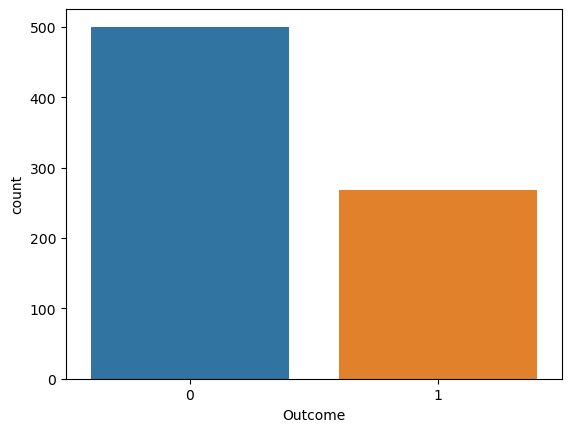

In [5]:
# Outcome countplot
sns.countplot(x = 'Outcome',data = dataset)


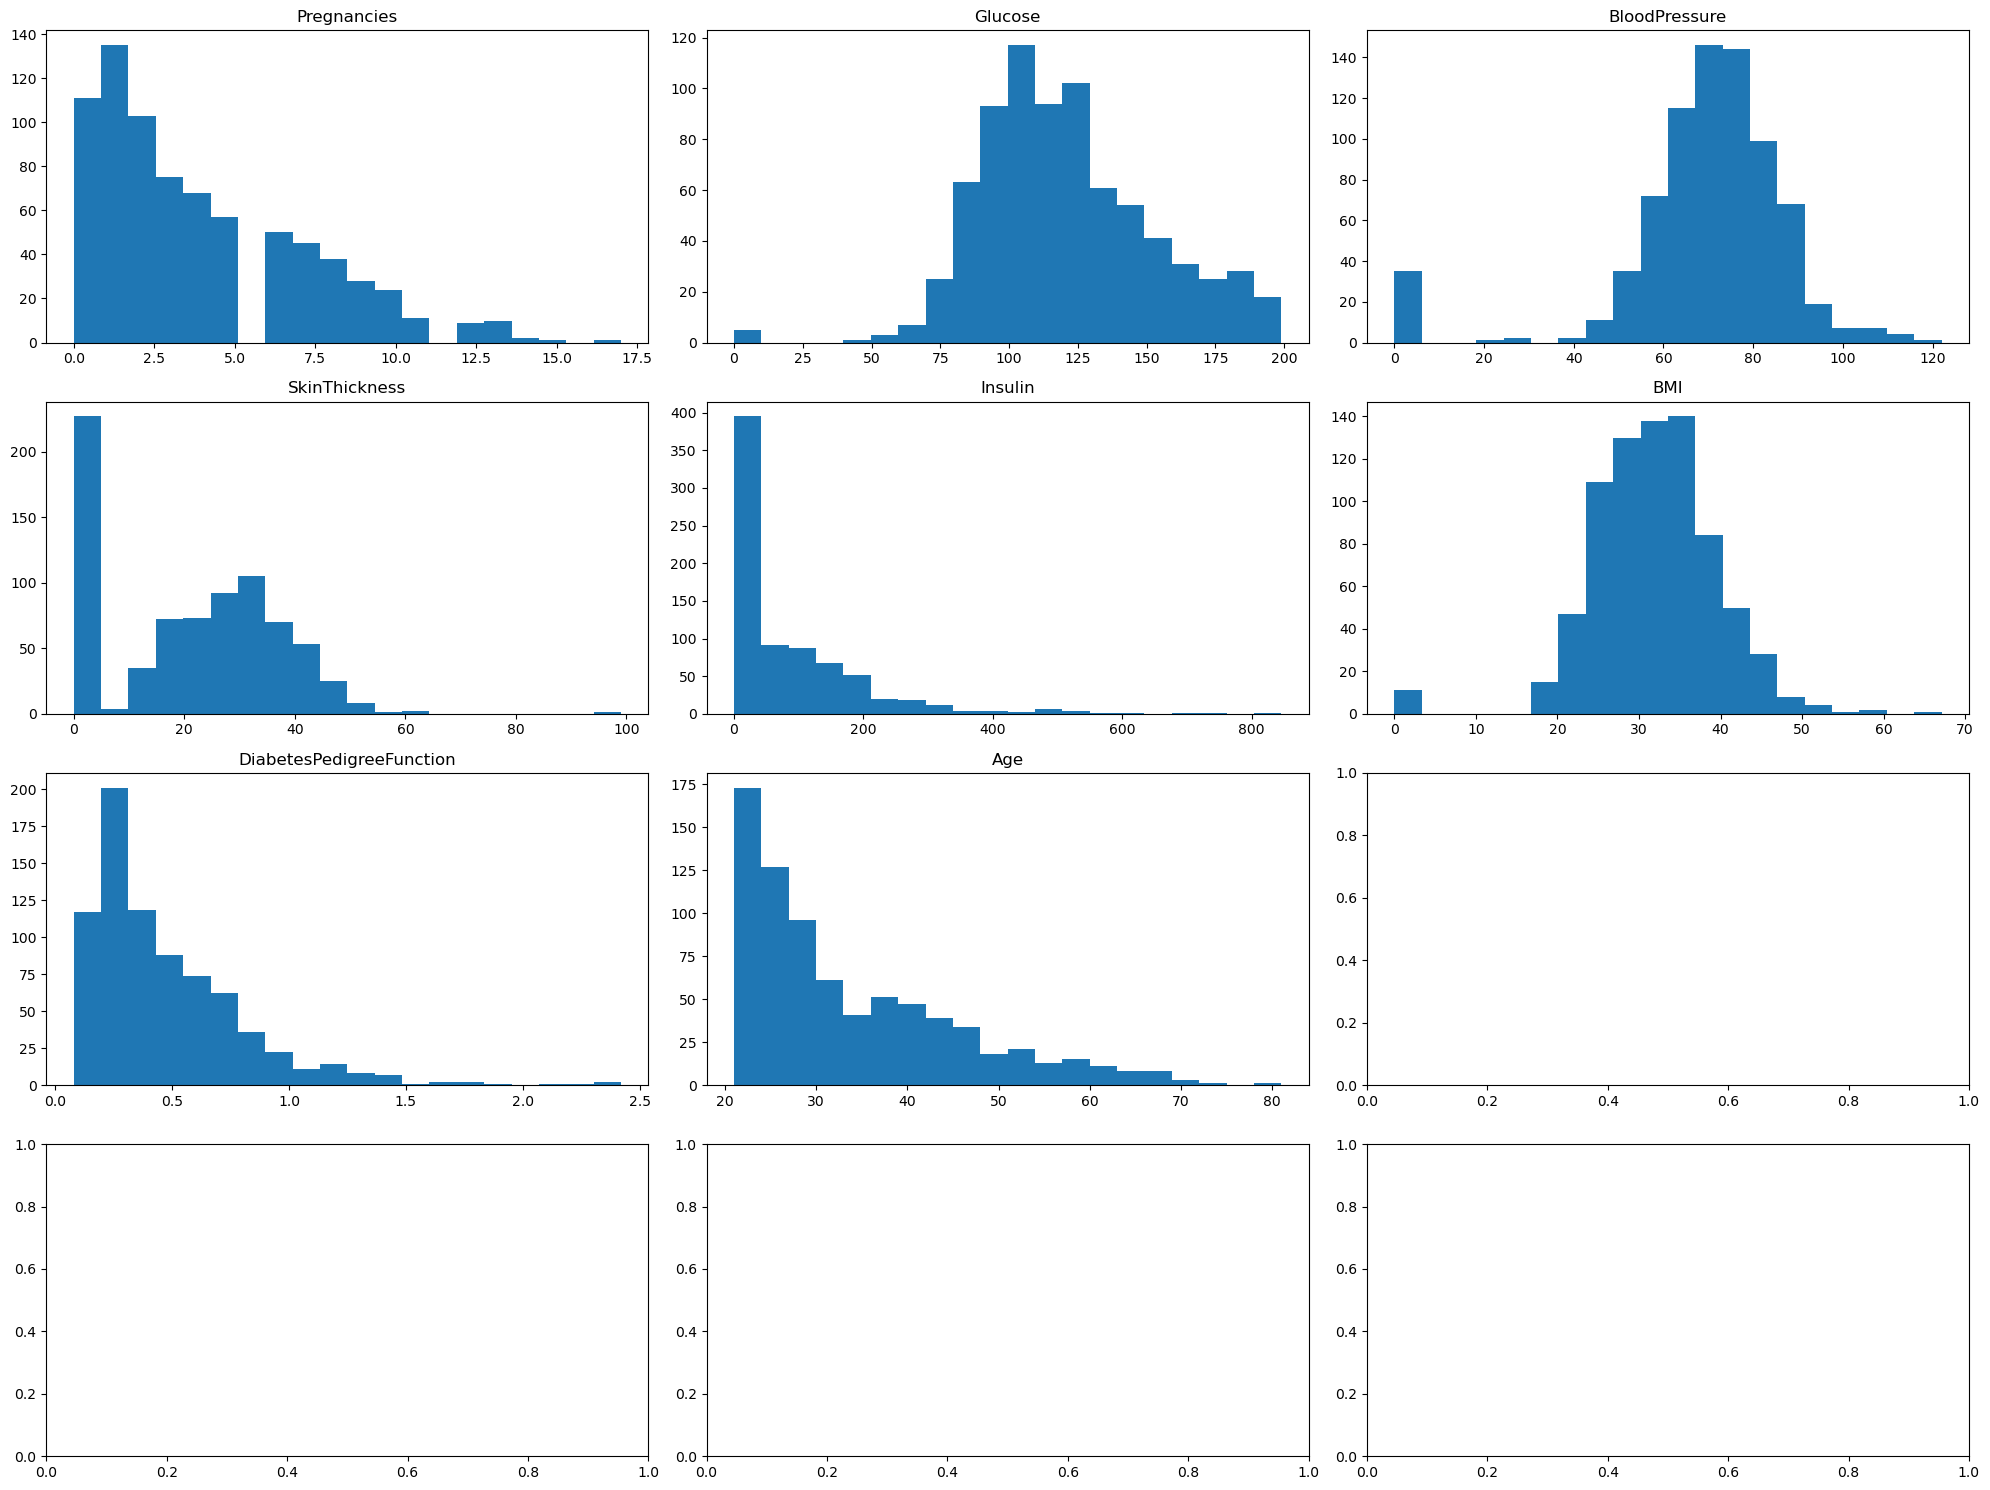

In [6]:
# Histogram of each feature
import matplotlib.pyplot as plt
import itertools

col = dataset.columns[:8]
fig, axes = plt.subplots(int(len(col) / 2), 3, figsize=(20, 15))
axes = axes.flatten()  # Flatten to easily iterate over all axes

for i, (feature, ax) in enumerate(zip(col, axes)):
    ax.hist(dataset[feature], bins=20)
    ax.set_title(feature)

plt.tight_layout()
plt.show()


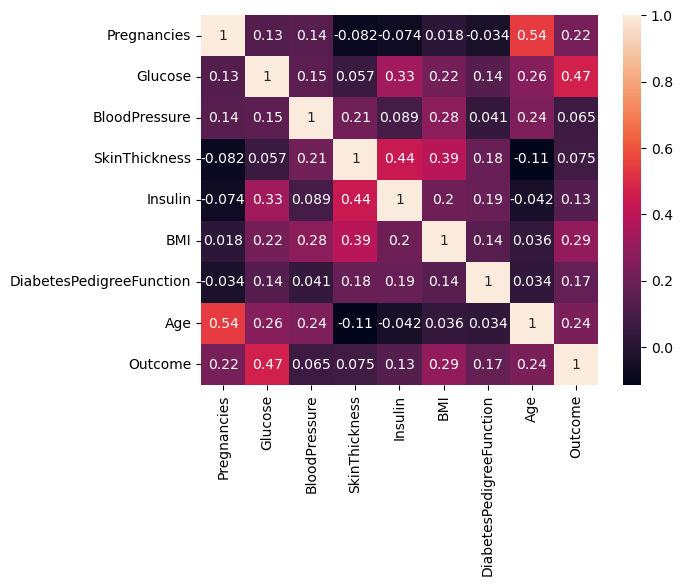

In [7]:
# Correlation heatmap
sns.heatmap(dataset.corr(), annot=True)
plt.show()

In [8]:
# Replace zero values with NaN for selected columns
dataset[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = dataset[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

# Fill NaN values with mean values
dataset.fillna(dataset.mean(), inplace=True)


In [9]:
# Replacing zero values with NaN
dataset[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)
# Count of NaN
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# Replacing NaN with mean values
dataset["Glucose"].fillna(dataset["Glucose"].mean(), inplace = True)
dataset["BloodPressure"].fillna(dataset["BloodPressure"].mean(), inplace = True)
dataset["SkinThickness"].fillna(dataset["SkinThickness"].mean(), inplace = True)
dataset["Insulin"].fillna(dataset["Insulin"].mean(), inplace = True)
dataset["BMI"].fillna(dataset["BMI"].mean(), inplace = True)

In [11]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset)
dataset_scaled = pd.DataFrame(dataset_scaled)

In [12]:
# Selecting features - [Glucose, Insulin, BMI, Age]
X = dataset_scaled.iloc[:, [1, 4, 5, 7]].values
Y = dataset_scaled.iloc[:, 8].values
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset['Outcome'] )
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 4)
X_test shape: (154, 4)
Y_train shape: (614,)
Y_test shape: (154,)


In [13]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)
# Making predictions on test dataset
Y_pred = svc.predict(X_test)

In [14]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: " + str(accuracy * 100))

Accuracy: 73.37662337662337


In [15]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[85, 15],
       [26, 28]], dtype=int64)

<Axes: >

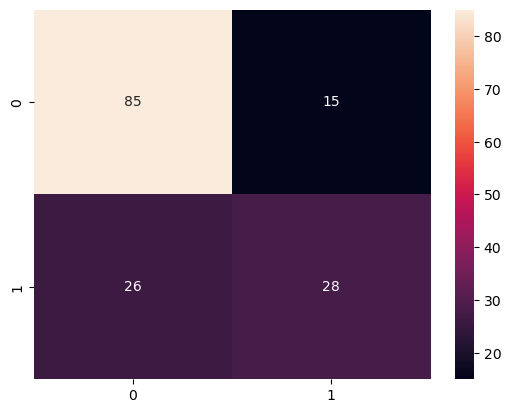

In [16]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [17]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.85      0.81       100
         1.0       0.65      0.52      0.58        54

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.73      0.73      0.73       154



In [18]:
print(dataset.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [19]:
print(dataset_scaled.describe())


                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.226180    0.501205    0.493930    0.240798    0.170130    0.291564   
std      0.198210    0.196361    0.123432    0.095554    0.102189    0.140596   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.058824    0.359677    0.408163    0.195652    0.129207    0.190184   
50%      0.176471    0.470968    0.491863    0.240798    0.170130    0.290389   
75%      0.352941    0.620968    0.571429    0.271739    0.170130    0.376278   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.168179    0.204015    0.348958  
std      0.141473    0.196004    0.476951  
min      0.000000    0.000000    0.000000  
25%      0.070773    0.050000    0.000000  
50%   

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Separate the features and target
X = dataset.drop('Outcome', axis=1)  # Features (exclude 'Outcome' column)
y = dataset['Outcome']  # Target column

# Feature scaling using MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X_scaled = sc.fit_transform(X)  # Scale only features, not target

# Convert scaled features to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Proceed with training the model
from sklearn.svm import SVC

svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train, y_train)

# Make predictions
y_pred = svc.predict(X_test)

# Print accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 77.27%


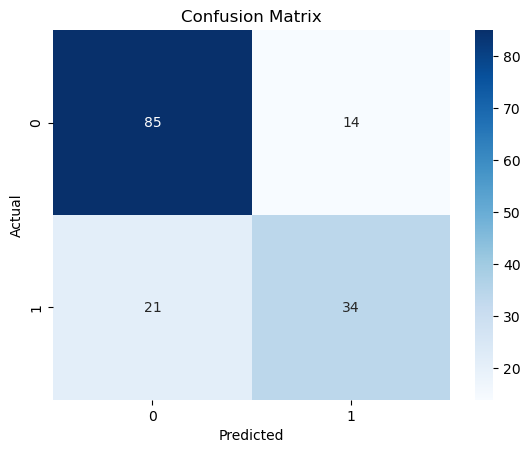

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svc, X, y, cv=5)
print(f'Cross-Validation Scores: {scores}')
print(f'Average Score: {scores.mean():.2f}')


Cross-Validation Scores: [0.75324675 0.74025974 0.77922078 0.79084967 0.76470588]
Average Score: 0.77
